In [1]:
import os
import json
import numpy as np
import pandas as pd
from tqdm import tqdm, tqdm_notebook
import keras
from torch.utils.data import Dataset, DataLoader
from basic_transformer.models.basic_transformer import BasicTransformer
from basic_transformer import utils as local_util

Using TensorFlow backend.


In [2]:
NUM_WORDS = 10_000
TEXT_COLUMN = 'review'
LABEL_COLUMN = 'sentiment'
LABEL_MAPPING = {'negative': 0, 'positive': 1}
MAX_SEQ_LEN = 300

In [3]:
# df = pd.read_csv("/media/can/MyData/datasets/yelp/df.csv")
df = pd.read_csv("/media/can/MyData/datasets/imdb-50k-movie-review/IMDB Dataset.csv")

In [4]:
datagen = local_util.dataset_generator.TextDataset(df=df, 
                                                   num_words=NUM_WORDS, 
                                                   text_column=TEXT_COLUMN, 
                                                   label_column=LABEL_COLUMN, 
                                                   label_mapping=LABEL_MAPPING, 
                                                   max_seq_len=400)

In [3]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
txt = df.iloc[0]['review']
txt

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [7]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=NUM_WORDS, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(df['review'])

In [8]:
tokenizer.texts_to_sequences(['dahufh duhaf dauhfishu that'])

[[12]]

In [12]:
x = tokenizer.texts_to_sequences([txt])
len(x[0])

294

In [14]:
x = tokenizer.texts_to_sequences(df['review'])

In [18]:
lens = pd.Series([len(s) for s in x])

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

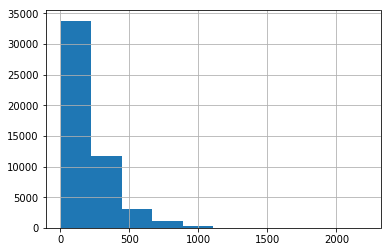

In [23]:
lens.hist()

In [21]:
import torch

In [22]:
emb_layer = torch.nn.Embedding(num_embeddings=17, embedding_dim=8)